In [1]:
import traci
import sumolib

In [2]:
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    #print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [3]:
import numpy as np

def n_vehiculos(n0, n1, n2):

    t0=0
    t1=0
    t2=0

    for i in range(n0):

        t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=t0
        )

    for i in range(n1):

        t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=t1
        )
    
    for i in range(n2):

        t2+= np.random.exponential(scale=3600/n2)

        traci.vehicle.add(
            vehID=f"veh_r2_{i}",
            routeID="r_2",
            depart=t2
        )

In [54]:
#Se importan algunos de los paquetes requeridos
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
n2s = []#Tiempos ruta 2
num_simulations = 100

f0 = [i for i in range(1500,25000, 2000)]
f1 = [i for i in range(2000,30000, 2000)]
f2 = [i for i in range(2000,30000, 2000)]

n0 = 1
n1 = 1

for i in range(num_simulations):

    n2 = rd.choice(f2)

    n0s.append(n0)
    n1s.append(n1)
    n2s.append(n2)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "prueba.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1, n2)

    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'Autos r_0': n0s,
    'Autos r_1': n1s,
    'Autos r_2': n2s
}

df100 = pd.DataFrame(data)
df100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


,Simulation,Tiempo promedio,Autos r_0,Autos r_1,Autos r_2
0,1,45.723179,1,1,26000
1,2,46.038564,1,1,10000
2,3,45.776149,1,1,6000
3,4,45.840241,1,1,18000
4,5,45.900859,1,1,10000
...,...,...,...,...,...
95,96,46.045424,1,1,24000
96,97,46.112224,1,1,8000
97,98,45.844474,1,1,2000
98,99,45.856096,1,1,28000


In [55]:
df100.to_csv('Data5.csv', index=False)

In [11]:
traci.close()

In [56]:
d1 = pd.read_csv('Data1.csv')
d2 = pd.read_csv('Data2.csv')
d3 = pd.read_csv('Data3.csv')
d4 = pd.read_csv('Data4.csv')
d5 = pd.read_csv('Data5.csv')

In [57]:
d = pd.concat([d1, d2, d3, d4, d5], ignore_index = True)

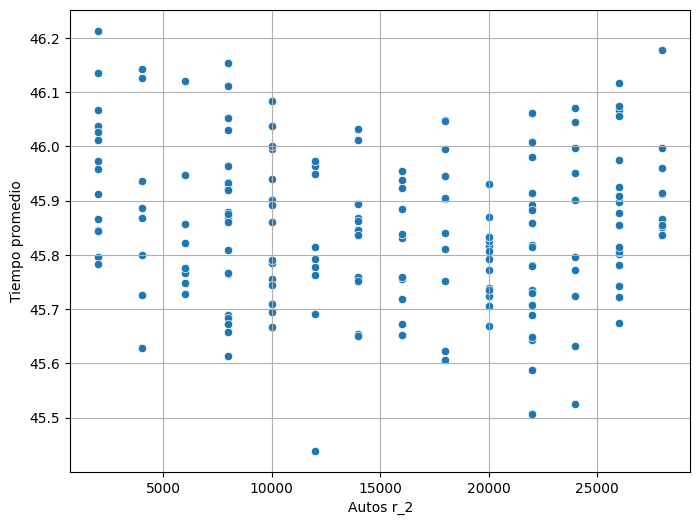

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=d['Autos r_2'], y=d['Tiempo promedio'])
plt.grid(True)
plt.show()